In [2]:
mat_file = "/home/cc/efficient-rsnn-bmi/data/datasets/indy_20160622_01.mat"

import h5py
data = h5py.File(mat_file)
print(data.keys())

<KeysViewHDF5 ['#refs#', 'chan_names', 'cursor_pos', 'finger_pos', 'spikes', 't', 'target_pos', 'wf']>


In [3]:
spikes = data['spikes']
print(spikes)

<HDF5 dataset "spikes": shape (5, 96), type "|O">


In [4]:
import matplotlib.pyplot as plt

spikes = spikes[:]

In [13]:
spikes.shape

(5, 96)

In [15]:
spike_refs = data['spikes']

In [29]:
spikes = data['spikes'][()]
spike_data = data[(spikes[0, 0])][:].squeeze()

In [35]:
import numpy as np

spike_matrix = np.zeros((1, len(spike_data)))

In [36]:
spike_matrix[0, :len(spike_data)] = spike_data[:len(spike_data)]

In [37]:
print(spike_matrix)

[[2277.18576538 2277.20149384 2277.78103035 ... 4735.65533253
  4735.99275752 4736.63258706]]


In [40]:
spike_matrix.shape

(1, 11313)

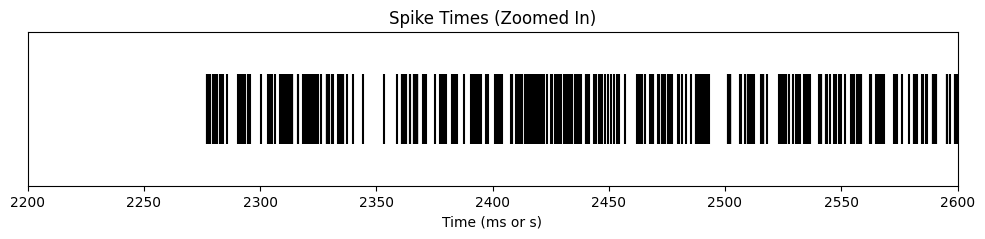

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 2))
plt.eventplot(spike_data, lineoffsets=1, linelengths=0.9, colors='black')
plt.xlim(2200, 2600)  # Adjust this window to match your interest
plt.title("Spike Times (Zoomed In)")
plt.xlabel("Time (ms or s)")
plt.yticks([])
plt.show()



In [45]:
dataset = h5py.File(mat_file, "r")
spikes = dataset["spikes"][()]
cursor_pos = dataset["cursor_pos"][()]
target_pos = dataset["target_pos"][()]
t = np.squeeze(dataset["t"][()])
# new_t = np.arange(t[0] - self.bin_width, t[-1], SAMPLING_RATE)

In [46]:
spike_train = np.zeros((*spikes.shape, len(t)), dtype=np.int8)

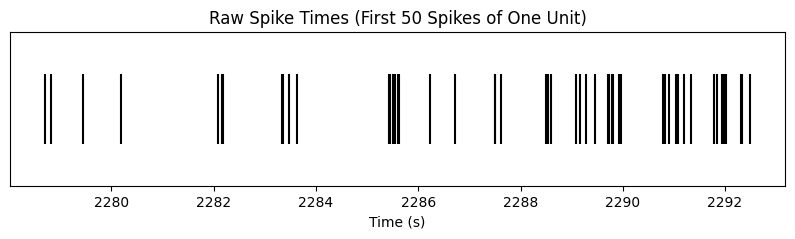

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Get first unit's spike times
ref = spikes[1, 6] # u x n channel
raw_spike_times = dataset[ref][()].squeeze()  # shape: (n_spikes,)

# Optional: limit to first 50 spikes
raw_spike_times = raw_spike_times[:50]

# Plot as vertical lines using eventplot
plt.figure(figsize=(10, 2))
plt.eventplot(raw_spike_times, lineoffsets=1, linelengths=0.9, colors='black')
plt.title("Raw Spike Times (First 50 Spikes of One Unit)")
plt.xlabel("Time (s)")
plt.yticks([])
plt.show()


In [68]:
raw_spike_times

array([2278.70601961, 2278.81538157, 2279.45136032, 2280.19559513,
       2282.08305181, 2282.16042438, 2282.18467243, 2283.32687014,
       2283.35722116, 2283.47747837, 2283.63771209, 2285.4226469 ,
       2285.45377615, 2285.51460107, 2285.54429674, 2285.59881388,
       2285.61474714, 2286.22610922, 2286.72421818, 2287.50302291,
       2287.50834765, 2287.61131993, 2288.50526188, 2288.53499851,
       2288.59447176, 2289.0819722 , 2289.16008205, 2289.28640127,
       2289.45073094, 2289.70193579, 2289.7272488 , 2289.79061322,
       2289.81211698, 2289.91766971, 2289.9667802 , 2290.7821208 ,
       2290.82688957, 2290.90053483, 2291.04798917, 2291.0740804 ,
       2291.20445461, 2291.33687681, 2291.78177933, 2291.8370747 ,
       2291.94328279, 2291.98112941, 2292.01070219, 2292.31421238,
       2292.33624862, 2292.48337528])

In [81]:
mat_file = "/home/cc/efficient-rsnn-bmi/data/datasets/indy_20160622_01.mat"

import h5py
data = h5py.File(mat_file)
print(data.keys())

<KeysViewHDF5 ['#refs#', 'chan_names', 'cursor_pos', 'finger_pos', 'spikes', 't', 'target_pos', 'wf']>


In [82]:
t = np.squeeze(data["t"][()])

In [83]:
len(t)

612420

In [1]:
import json

file_path = '/home/cc/efficient-rsnn-bmi/notebooks/synaps-delay-0.05.json'

with open(file_path, 'r') as f:
    data = json.load(f)
    print(len(data['train_loss']))

172


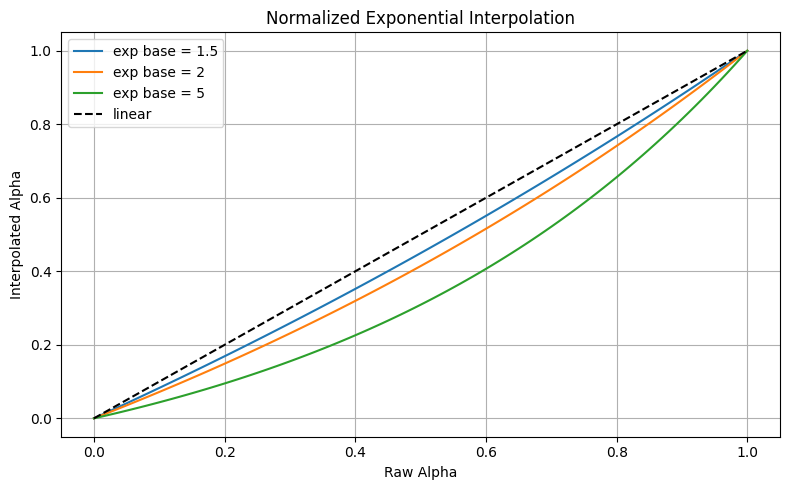

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Settings
n_steps = 100
x = np.linspace(0, 1, n_steps + 1)
exp_bases = [1.5, 2, 5]

# Plot
plt.figure(figsize=(8, 5))

for base in exp_bases:
    y = (base**x - 1) / (base - 1)  # normalized exponential interpolation
    plt.plot(x, y, label=f'exp base = {base}')

# Add linear reference
plt.plot(x, x, 'k--', label='linear')

plt.title("Normalized Exponential Interpolation")
plt.xlabel("Raw Alpha")
plt.ylabel("Interpolated Alpha")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [2]:
import torch

def exponential_interpolate(A, B, n_steps):
    """
    Performs exponential interpolation between two tensors A and B.

    Args:
        A (torch.Tensor): The starting tensor.
        B (torch.Tensor): The ending tensor.
        n_steps (int): The number of interpolation steps.

    Returns:
        torch.Tensor: A tensor containing the interpolated values,
                      with shape (n_steps + 1, ...).
    """
    device = A.device
    alphas = torch.linspace(0, 1, n_steps + 1, device=device)
    alphas = alphas.view((-1,) + (1,) * (A.dim() - 1)) # Reshape for broadcasting

    # Ensure A and B are positive for the log operation
    # A small epsilon is added to avoid log(0)
    interpolated = torch.exp(
        (1 - alphas) * torch.log(A + 1e-8) + alphas * torch.log(B + 1e-8)
    )

    return interpolated

In [3]:
A = torch.randn(250, 64)
B = torch.randn(250, 64)
interpolated_tensors = exponential_interpolate(A, B, 10)
print(interpolated_tensors.shape) # Should be (11, 250, 64)

RuntimeError: The size of tensor a (11) must match the size of tensor b (250) at non-singleton dimension 0

In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np

def plot_training_logs(json_file_no_delay, json_file_with_delay, json_file_with_interpolation):
    """
    Loads training logs from two JSON files and plots loss and R² scores.

    Args:
        json_file_no_delay (str): Path to the JSON file without delay logs.
        json_file_with_delay (str): Path to the JSON file with delay logs.
    """
    try:
        # Load the data from JSON files
        with open(json_file_no_delay, 'r') as f:
            data_baseline = json.load(f)

        with open(json_file_with_delay, 'r') as f:
            data_with_delay = json.load(f)

        with open(json_file_with_interpolation, 'r') as f:
            data_with_interpolation = json.load(f)

        print("Successfully loaded both JSON files.")

        # --- Data Preparation ---
        # Ensure both logs have the same number of epochs for fair plotting
        min_epochs = min(len(data_baseline['loss']), len(data_with_delay['loss']))
        epochs = np.arange(1, min_epochs + 1)

        # Slice data to the minimum number of epochs
        data_baseline = {k: v[:min_epochs] for k, v in data_baseline.items() if isinstance(v, list)}
        data_with_delay = {k: v[:min_epochs] for k, v in data_with_delay.items() if isinstance(v, list)}
        data_with_interpolation = {k: v[:min_epochs] for k, v in data_with_interpolation.items() if isinstance(v, list)}


        # --- Plotting ---
        plt.style.use('seaborn-v0_8-whitegrid')
        fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # Create 1 row, 2 columns of plots

        # Plot 1: Loss vs. Epoch
        axes[0].plot(epochs, data_baseline['loss'], 'o-', label='Train Loss (Baseline)', color='tab:blue', alpha=0.8)
        axes[0].plot(epochs, data_baseline['val_loss'], 's--', label='Validation Loss (Baseline)', color='tab:blue', alpha=0.8)
        axes[0].plot(epochs, data_with_delay['loss'], 'o-', label='Train Loss (With Delay)', color='tab:orange', alpha=0.8)
        axes[0].plot(epochs, data_with_delay['val_loss'], 's--', label='Validation Loss (With Delay)', color='tab:orange', alpha=0.8)
        axes[0].plot(epochs, data_with_interpolation['loss'], 'o-', label='Train Loss (With Interpolation)', color='tab:purple', alpha=0.8)
        axes[0].plot(epochs, data_with_interpolation['val_loss'], 's--', label='Validation Loss (With Interpolation)', color='tab:purple', alpha=0.8)
        axes[0].set_title('Training and Validation Loss')
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('Loss (RMSE)')
        axes[0].legend(loc='upper right')
        axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)
        axes[0].set_xticks(epochs) # Ensure ticks for each epoch

        # Plot 2: R² vs. Epoch
        axes[1].plot(epochs, data_baseline['r2'], 'o-', label='Train R² (Baseline)', color='tab:green', alpha=0.8)
        axes[1].plot(epochs, data_baseline['val_r2'], 's--', label='Validation R² (Baseline)', color='tab:green', alpha=0.8)
        axes[1].plot(epochs, data_with_delay['r2'], 'o-', label='Train R² (With Delay)', color='tab:red', alpha=0.8)
        axes[1].plot(epochs, data_with_delay['val_r2'], 's--', label='Validation R² (With Delay)', color='tab:red', alpha=0.8)
        axes[1].plot(epochs, data_with_interpolation['r2'], 'o-', label='Train R² (With Interpolation)', color='tab:orange', alpha=0.8)
        axes[1].plot(epochs, data_with_interpolation['val_r2'], 's--', label='Validation R² (With Interpolation)', color='tab:orange', alpha=0.8)
        axes[1].set_title('Training and Validation R² Score')
        axes[1].set_xlabel('Epoch')
        axes[1].set_ylabel('R² Score')
        axes[1].legend(loc='lower right')
        axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
        axes[1].set_xticks(epochs) # Ensure ticks for each epoch
        axes[1].axhline(0, color='black', linewidth=0.5, linestyle=':') # Add R² = 0 line

        # --- Display Plot ---
        plt.tight_layout() # Adjust layout to prevent overlap
        plt.show()

    except FileNotFoundError:
        print("Error: Make sure both JSON files exist in the same directory.")
    except Exception as e:
        print(f"An error occurred: {e}")

# --- How to use it ---
# 1. Save this code as a Python file (e.g., plot_logs.py).
# 2. Make sure your two JSON files:
#    - training_early_5epoch_result.json
#    - training_early_5epoch_delay_result.json
#    are in the SAME directory as the Python file.
# 3. Run the script from your terminal: python plot_logs.py
# 4. If you want to use it in a Jupyter Notebook or Google Colab,
#    you can paste this code into a cell and run it, ensuring you
#    upload the JSON files first.

# Example call (if running as a script, you'd call it like this):
# plot_training_logs('training_early_5epoch_result.json', 'training_early_5epoch_delay_result.json')

Successfully loaded both JSON files.


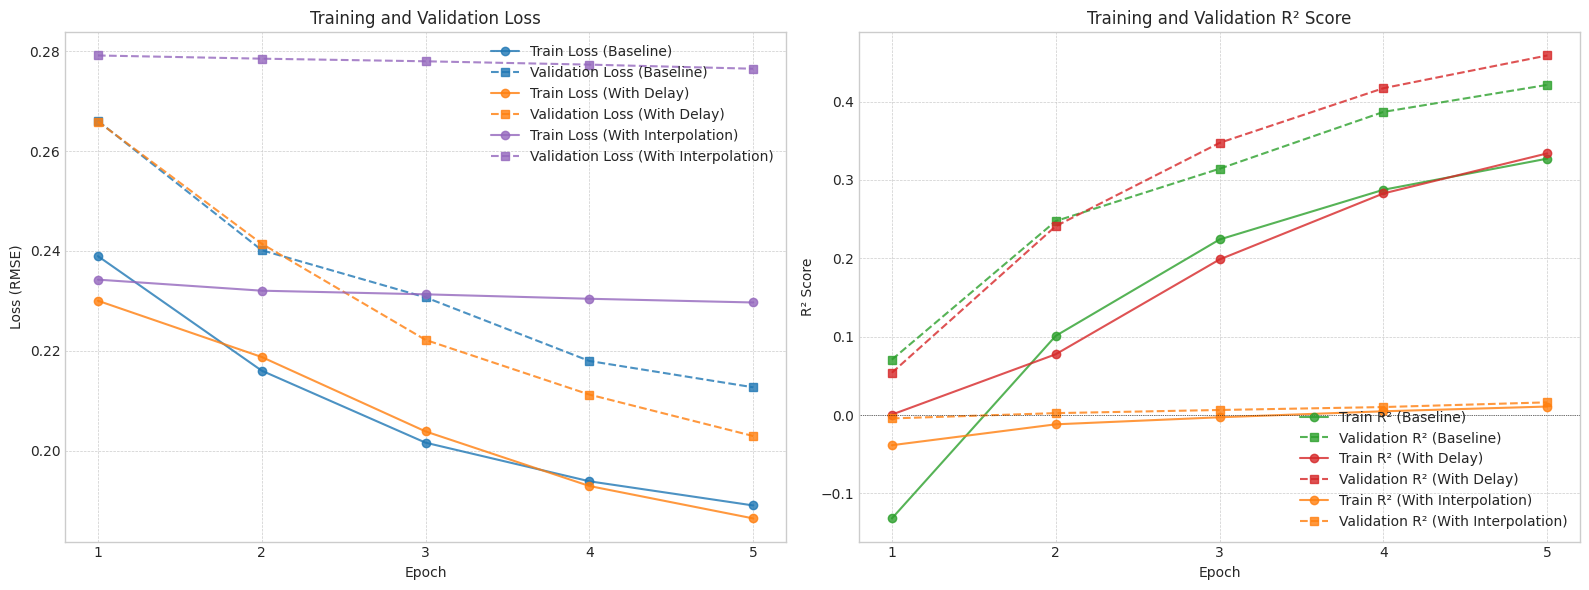

In [4]:
plot_training_logs('training_early_5epoch_result.json', 'training_early_5epoch_delay_result.json', 'training_interpolation_early_5epoch_result.json')

In [ ]:
import json
import matplotlib.pyplot as plt
import pandas as pd

# List of file names and corresponding titles for the plots
files_info = [
    {
        "fileName": "results/0.1_lr_delay_pretraining_results_on_indy.json", # Ensure this path is correct
        "title": "0.1 LR Delay Pre-training"
    },
    {
        "fileName": "results/2keys_interpolation_pretraining_results_on_indy.json", # Ensure this path is correct
        "title": "2 Keys Interpolation Pre-training"
    },
    {
        "fileName": "results/baseline_pretraining_results_on_indy.json", # Ensure this path is correct
        "title": "Baseline Pre-training"
    },
    {
        "fileName": "results/8keys_interpolation_pretraining_results_on_indy.json", # Ensure this path is correct
        "title": "8 Keys Interpolation Pre-training"
    }
]

# Create Figure 1: Training and Validation Loss Comparison
fig1, axes1 = plt.subplots(2, 2, figsize=(15, 10))
fig1.suptitle('Training and Validation Loss Comparison', fontsize=16)
axes1 = axes1.ravel() # Flatten the 2x2 array of axes for easy iteration

for i, file_info in enumerate(files_info):
    try:
        with open(file_info["fileName"], 'r') as f:
            data = json.load(f)
        
        df = pd.DataFrame(data)
        
        if 'train_loss' not in df.columns or 'val_loss' not in df.columns:
            print(f"Skipping loss plot for {file_info['title']} due to missing columns.")
            axes1[i].set_title(f"{file_info['title']}\n(Data Missing)")
            axes1[i].text(0.5, 0.5, 'Loss data not available', horizontalalignment='center', verticalalignment='center')
            continue

        epochs_train_loss = range(1, len(df['train_loss']) + 1)
        # val_loss often has a different number of entries due to evaluation frequency.
        # Create a simple epoch list based on its length.
        epochs_val_loss = range(1, len(df['val_loss']) + 1) 
        
        axes1[i].plot(epochs_train_loss, df['train_loss'], label='Train Loss')
        axes1[i].plot(epochs_val_loss, df['val_loss'], label='Validation Loss', linestyle='--')
        axes1[i].set_xlabel('Epochs')
        axes1[i].set_ylabel('Loss')
        axes1[i].set_title(file_info["title"])
        axes1[i].legend()
        axes1[i].grid(True)
    except Exception as e:
        print(f"Error processing file {file_info['fileName']} for loss plot: {e}")
        axes1[i].set_title(f"{file_info['title']}\n(Error Loading Data)")
        axes1[i].text(0.5, 0.5, 'Error loading data', horizontalalignment='center', verticalalignment='center')


plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.savefig('loss_comparison_plots.png')
plt.close(fig1) 

# Create Figure 2: Training and Validation R2 Score Comparison
fig2, axes2 = plt.subplots(2, 2, figsize=(15, 10))
fig2.suptitle(r'Training and Validation $R^2$ Score Comparison', fontsize=16)
axes2 = axes2.ravel() 

for i, file_info in enumerate(files_info):
    try:
        with open(file_info["fileName"], 'r') as f:
            data = json.load(f)
            
        df = pd.DataFrame(data)

        if 'train_r2' not in df.columns or 'val_r2' not in df.columns:
            print(f"Skipping R2 plot for {file_info['title']} due to missing columns.")
            axes2[i].set_title(f"{file_info['title']}\n(Data Missing)")
            axes2[i].text(0.5, 0.5, r'$R^2$ data not available', horizontalalignment='center', verticalalignment='center')
            continue
            
        epochs_train_r2 = range(1, len(df['train_r2']) + 1)
        epochs_val_r2 = range(1, len(df['val_r2']) + 1)
                
        axes2[i].plot(epochs_train_r2, df['train_r2'], label=r'Train $R^2$') 
        axes2[i].plot(epochs_val_r2, df['val_r2'], label=r'Validation $R^2$', linestyle='--') 
        axes2[i].set_xlabel('Epochs')
        axes2[i].set_ylabel(r'$R^2$ Score') 
        axes2[i].set_title(file_info["title"])
        axes2[i].legend()
        axes2[i].grid(True)
    except Exception as e:
        print(f"Error processing file {file_info['fileName']} for R2 plot: {e}")
        axes2[i].set_title(f"{file_info['title']}\n(Error Loading Data)")
        axes2[i].text(0.5, 0.5, 'Error loading data', horizontalalignment='center', verticalalignment='center')

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.savefig('r2_score_comparison_plots.png')
plt.close(fig2)

print("Plots generated: loss_comparison_plots.png and r2_score_comparison_plots.png")

Plots generated: loss_comparison_plots.png and r2_score_comparison_plots.png


In [8]:
import json
import matplotlib.pyplot as plt
import pandas as pd

# List of file names and corresponding titles for the plots
files_info = [
    {
        "fileName": "results/0.1_lr_delay_pretraining_results_on_indy.json", # Ensure this path is correct
        "title": "0.1 LR Delay Pre-training"
    },
    {
        "fileName": "results/2keys_interpolation_pretraining_results_on_indy.json", # Ensure this path is correct
        "title": "2 Keys Interpolation Pre-training"
    },
    {
        "fileName": "results/baseline_pretraining_results_on_indy.json", # Ensure this path is correct
        "title": "Baseline Pre-training"
    },
    {
        "fileName": "results/8keys_interpolation_pretraining_results_on_indy.json", # Ensure this path is correct
        "title": "8 Keys Interpolation Pre-training"
    }
]

# Create Figure 1: Combined Loss Metrics Comparison
fig1, axes1 = plt.subplots(2, 1, figsize=(12, 10), sharex=True) # Shared X for easier comparison
fig1.suptitle('Combined Loss Metrics Comparison', fontsize=16)

# Top subplot for Training Loss
axes1[0].set_title('All Training Losses')
axes1[0].set_ylabel('Training Loss')
axes1[0].grid(True)

# Bottom subplot for Validation Loss
axes1[1].set_title('All Validation Losses')
axes1[1].set_xlabel('Epochs')
axes1[1].set_ylabel('Validation Loss')
axes1[1].grid(True)

for file_info in files_info:
    try:
        with open(file_info["fileName"], 'r') as f:
            data = json.load(f)
        df = pd.DataFrame(data)

        if 'train_loss' in df.columns:
            epochs_train_loss = range(1, len(df['train_loss']) + 1)
            axes1[0].plot(epochs_train_loss, df['train_loss'], label=f"{file_info["title"]} Train Loss")
        else:
            print(f"Train loss not found in {file_info['fileName']}")
            
        if 'val_loss' in df.columns:
            # val_loss can have a different number of entries. Plotting based on its own length.
            epochs_val_loss = range(1, len(df['val_loss']) + 1)
            axes1[1].plot(epochs_val_loss, df['val_loss'], label=f"{file_info["title"]} Val Loss", linestyle='--')
        else:
            print(f"Validation loss not found in {file_info['fileName']}")

    except Exception as e:
        print(f"Error processing file {file_info['fileName']} for loss plot: {e}")
        # Optionally mark on plot if a file fails
        axes1[0].text(0.5, 0.5, f"Error loading {file_info["title"]}", transform=axes1[0].transAxes, ha="center")
        axes1[1].text(0.5, 0.5, f"Error loading {file_info["title"]}", transform=axes1[1].transAxes, ha="center")


axes1[0].legend(loc='upper right')
axes1[1].legend(loc='upper right')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('combined_loss_comparison.png')
plt.close(fig1)

# Create Figure 2: Combined R2 Score Metrics Comparison
fig2, axes2 = plt.subplots(2, 1, figsize=(12, 10), sharex=True) # Shared X
fig2.suptitle(r'Combined $R^2$ Score Metrics Comparison', fontsize=16)

# Top subplot for Training R2
axes2[0].set_title(r'All Training $R^2$ Scores')
axes2[0].set_ylabel(r'Training $R^2$ Score')
axes2[0].grid(True)

# Bottom subplot for Validation R2
axes2[1].set_title(r'All Validation $R^2$ Scores')
axes2[1].set_xlabel('Epochs')
axes2[1].set_ylabel(r'Validation $R^2$ Score')
axes2[1].grid(True)

for file_info in files_info:
    try:
        with open(file_info["fileName"], 'r') as f:
            data = json.load(f)
        df = pd.DataFrame(data)

        if 'train_r2' in df.columns:
            epochs_train_r2 = range(1, len(df['train_r2']) + 1)
            axes2[0].plot(epochs_train_r2, df['train_r2'], label=f"{file_info['title']} Train $R^2$")
        else:
            print(f"Train R2 not found in {file_info['fileName']}")

        if 'val_r2' in df.columns:
            epochs_val_r2 = range(1, len(df['val_r2']) + 1)
            axes2[1].plot(epochs_val_r2, df['val_r2'], label=f"{file_info['title']} Val $R^2$", linestyle='--')
        else:
            print(f"Validation R2 not found in {file_info['fileName']}")
            
    except Exception as e:
        print(f"Error processing file {file_info['fileName']} for R2 plot: {e}")
        axes2[0].text(0.5, 0.5, f"Error loading {file_info['title']}", transform=axes2[0].transAxes, ha="center")
        axes2[1].text(0.5, 0.5, f"Error loading {file_info['title']}", transform=axes2[1].transAxes, ha="center")

axes2[0].legend(loc='lower right')
axes2[1].legend(loc='lower right')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('combined_r2_score_comparison.png')
plt.close(fig2)

print("Combined comparison plots generated: combined_loss_comparison.png and combined_r2_score_comparison.png")

Combined comparison plots generated: combined_loss_comparison.png and combined_r2_score_comparison.png


In [1]:
import wandb

In [2]:
from neurobench.datasets.primate_reaching import PrimateReaching

In [3]:
PrimateReaching.md5s.keys()

dict_keys(['indy_20170131_02.mat', 'indy_20160630_01.mat', 'indy_20160622_01.mat', 'loco_20170301_05.mat', 'loco_20170215_02.mat', 'loco_20170210_03.mat'])

In [4]:
md5 = PrimateReaching.md5s['indy_20170131_02.mat']
print(md5)

2790b1c869564afaa7772dbf9e42d784


In [6]:
import os
print(os.path.dirname(md5))

In [18]:
dataset = PrimateReaching(
    file_path='../data/datasets',
    filename='indy_20160407_02.mat',
    num_steps=1,
    download=True,
    train_ratio=0.5,
    remove_segments_inactive=True
)

KeyError: 'indy_20160407_02.mat'

In [15]:
import numpy as np

np.arange(0, 5)

array([0, 1, 2, 3, 4])

In [3]:
test_dataset = PrimateReaching(
    file_path='../data/datasets',
    filename='indy_20170131_02.mat',
    num_steps=1,
    download=True,
    train_ratio=0.5,
    remove_segments_inactive=False
)

Loading indy_20170131_02.mat


In [4]:
len(test_dataset[0][0][0])

96

torch.Size([96])

In [ ]:
dataset

In [4]:
len(dataset)

203995

In [6]:
len(dataset[0][0][0])

96

In [7]:
dataset[0]

(tensor([[0., 2., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 2., 0.,
          2., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
          1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 1., 0., 0.]]),
 tensor([-0.1457, -0.1481]))

In [8]:
dataset.split_data()

In [9]:
len(dataset)

407990

In [10]:
len(dataset.ind_train)

200868

In [11]:
len(dataset.ind_test)

104232

In [12]:
dataset[0]

(tensor([[0., 2., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 2., 0.,
          2., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
          1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 1., 0., 0.]]),
 tensor([-0.1457, -0.1481]))

In [13]:
ind_train_val = dataset.ind_train + dataset.ind_val
len(ind_train_val)

303758

In [14]:
import math

eff_ratio_val = 0.25 / (math.ceil(len(ind_train_val) / len(dataset)*100) / 100)
eff_ratio_val

0.3333333333333333

In [15]:
import numpy as np

n_val = int(np.round(len(dataset) * eff_ratio_val))
n_val

135997

In [16]:
array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
start_idx = np.random.choice(a=array[:-3], size=1)[0]
start_idx

5

In [17]:
ind_train_val[:-n_val]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [18]:
start_idx = np.random.choice(a=ind_train_val[:-n_val], size=1)[0]
start_idx

19849

In [19]:
ind_val = np.array(ind_train_val[start_idx:start_idx + n_val])
ind_val

array([19849, 19850, 19851, ..., 55409, 55410, 55411])

In [20]:

ind_train = np.array(sorted(set(ind_train_val) - set(ind_val)))
ind_train

array([100434, 100435, 100436, ..., 151876, 151877, 151878])

In [21]:
similar_train_val = np.intersect1d(ind_val, ind_train)
similar_train_val

array([], dtype=int64)

In [22]:
similar_train_test = np.intersect1d(ind_train_val, test_dataset.ind_test)
similar_train_test

array([], dtype=int64)

In [23]:
len(dataset.ind_val)

102890

In [24]:
dataset.labels.T

tensor([[-0.1457, -0.1481],
        [-0.1421, -0.1479],
        [-0.1347, -0.1474],
        ...,
        [-0.1401,  0.1501],
        [-0.1251,  0.1346],
        [-0.1168,  0.1259]])

In [25]:
spikes_train = dataset.samples.T[ind_train]

In [26]:
spikes_train

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [4]:
import logging
import sys
import colorlog

def get_logger(name=None):
    logger = colorlog.getLogger(name or "rsnn")

    if logger.hasHandlers():
        logger.handlers.clear()

    logger.setLevel(logging.INFO)
    handler = colorlog.StreamHandler(stream=sys.stdout)

    formatter = colorlog.ColoredFormatter(
        '%(asctime_log_color)s[%(asctime)s] '
        '%(levelname_log_color)s[%(levelname)s] '
        '%(name_log_color)s[%(name)s] '
        '%(message_log_color)s- %(message)s',
        datefmt='%Y-%m-%d %H:%M:%S',
        log_colors={
            'DEBUG': 'cyan',
            'INFO': 'green',
            'WARNING': 'yellow',
            'ERROR': 'red',
            'CRITICAL': 'red,bg_white',
        },
        secondary_log_colors={
            'asctime': {
                'DEBUG': 'white',
                'INFO': 'blue',
                'WARNING': 'yellow',
                'ERROR': 'red',
                'CRITICAL': 'red,bg_white',
            },
            'levelname': {
                'DEBUG': 'white',
                'INFO': 'yellow',
                'WARNING': 'blue',
                'ERROR': 'red',
                'CRITICAL': 'red,bg_white',
            },
            'name': {
                'DEBUG': 'white',
                'INFO': 'green',
                'WARNING': 'yellow',
                'ERROR': 'red',
                'CRITICAL': 'red,bg_white',
            },
            'message': {
                'DEBUG': 'green',
                'INFO': 'white',
                'WARNING': 'yellow',
                'ERROR': 'red',
                'CRITICAL': 'red,bg_white',
            },
        },
        style='%'
    )

    handler.setFormatter(formatter)
    logger.addHandler(handler)
    logger.propagate = False

    return logger


In [57]:
logger = get_logger('rsnn')

In [58]:
logger.info('This is an info message')

[2025-04-30 10:47:22] [INFO] [rsnn] - This is an info message


In [13]:
import pprint

def formatted_cfg_logger(cfg):
    """
    Log the configuration in a formatted way.
    """
    formatted_cfg = pprint.pformat(cfg, indent=2, compact=False, depth=1)
    # print(formatted_cfg)
    # formatted_cfg = "{\n" + "\n".join(f'{line}' for line in formatted_cfg[1:-1]) + "\n}"

    return formatted_cfg

In [3]:
config = {'filename': 'indy_20170131_02.mat', 'file_path': '/home/cc/efficient-rsnn-bmi/data/datasets', 'train_ratio': 0.8, 'val_ratio': 0.1, 'random_val': False, 'stride': 0.004, 'extend_data': True, 'sample_duration': 2.0, 'remove_segments_inactive': False, 'p_drop': 0.0, 'p_insert': 0.0, 'jitter_sigma': 0.0}

In [5]:
logger = get_logger('rsnn')

In [14]:
formatted_cfg = formatted_cfg_logger(config)
logger.info(formatted_cfg)

[2025-05-06 09:44:29] [INFO] [rsnn] - { 'extend_data': True,
  'file_path': '/home/cc/efficient-rsnn-bmi/data/datasets',
  'filename': 'indy_20170131_02.mat',
  'jitter_sigma': 0.0,
  'p_drop': 0.0,
  'p_insert': 0.0,
  'random_val': False,
  'remove_segments_inactive': False,
  'sample_duration': 2.0,
  'stride': 0.004,
  'train_ratio': 0.8,
  'val_ratio': 0.1}


In [24]:
formatted_cfg.splitlines()

['{',
 '',
 " 'extend_data': True,",
 "  'file_path': '/home/cc/efficient-rsnn-bmi/data/datasets',",
 "  'filename': 'indy_20170131_02.mat',",
 "  'jitter_sigma': 0.0,",
 "  'p_drop': 0.0,",
 "  'p_insert': 0.0,",
 "  'random_val': False,",
 "  'remove_segments_inactive': False,",
 "  'sample_duration': 2.0,",
 "  'stride': 0.004,",
 "  'train_ratio': 0.8,",
 "  'val_ratio': 0.1",
 '',
 '}']

In [3]:
!pip show stork


Name: stork
Version: 3.2.1
Summary: Update libraries on Databricks
Home-page: https://github.com/shoprunner/stork
Author: Hanna Torrence
Author-email: data-science@shoprunner.com
License: BSD-3-Clause
Location: /home/cc/efficient-rsnn-bmi/venvs/efficient-rsnn-bmi/lib/python3.12/site-packages
Requires: click, click-log, configparser, requests, simplejson
Required-by: efficient-rsnn-bmi


In [2]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 107.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 108.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11/11 [seaborn]0/11 [seaborn]ib]


In [3]:
from stork.models import RecurrentSpikingModel

In [10]:
import __main__
print(__main__.__package__)

None


In [13]:
import sys
import os

sys.path.append(os.path.abspath("..")) 

In [17]:
int(2 / 0.004)

500

In [18]:
from efficient_rsnn_bmi.experiments.models.rsnn.rsnn import BaselineRecurrentSpikingModel

model = BaselineRecurrentSpikingModel(
    250,
    nb_time_steps=500,
    nb_inputs=192,
    dtype='float32'
)

In [19]:
model

BaselineRecurrentSpikingModel()

In [90]:
import torch
# import the dataloader
from torch.utils.data import DataLoader

# import the dataset, preprocessors and postprocessors you want to use
from neurobench.datasets import SpeechCommands
from neurobench.processors.preprocessors import S2SPreProcessor
from neurobench.processors.postprocessors import ChooseMaxCount

# import the NeuroBench wrapper to wrap the snnTorch model
from neurobench.models import SNNTorchModel

# import metrics
from neurobench.metrics.workload import (
    ActivationSparsity,
    SynapticOperations,
    ClassificationAccuracy,
    R2,
)
from neurobench.metrics.static import (
    Footprint,
    ConnectionSparsity,
)

# import the benchmark class
from neurobench.benchmarks import Benchmark

In [91]:
from torch import nn
import snntorch as snn
from snntorch import surrogate

beta = 0.9
spike_grad = surrogate.fast_sigmoid()
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(20, 256),
    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True),
    nn.Linear(256, 256),
    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True),
    nn.Linear(256, 256),
    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True),
    nn.Linear(256, 35),
    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True, output=True),
)

In [104]:
!nvidia-smi

2570.71s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Mon May 19 12:21:22 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.230.02             Driver Version: 535.230.02   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-SXM2-16GB           Off | 00000000:04:00.0 Off |                    0 |
| N/A   35C    P0              43W / 300W |   2422MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [97]:
def to_cuda(batch):
    inputs, targets = zip(*batch)  # unzip list of tuples
    inputs = torch.stack(inputs).to('cuda')
    targets = torch.tensor(targets).to('cuda')
    return inputs, targets

In [98]:
test_set = SpeechCommands(path="data/speech_commands/", subset="testing")

test_set_loader = DataLoader(test_set, batch_size=500, shuffle=True, collate_fn=to_cuda)


In [99]:
net.load_state_dict(torch.load("s2s_gsc_snntorch"))

net.to("cuda")

# Wrap our net in the SNNTorchModel wrapper
model = SNNTorchModel(net)

In [100]:
preprocessors = [S2SPreProcessor(device='cuda')]
postprocessors = [ChooseMaxCount()]

In [113]:
static_metrics = [Footprint, ConnectionSparsity]
workload_metrics = [R2]

In [114]:
benchmark = Benchmark(model, test_set_loader,
                      preprocessors, postprocessors, [static_metrics, workload_metrics])

In [115]:
results = benchmark.run()
print(results)

Running benchmark


  4%|▍         | 1/23 [00:00<00:13,  1.66it/s]

Error running workload metric 'R2': too many indices for tensor of dimension 1


  9%|▊         | 2/23 [00:01<00:12,  1.67it/s]

Error running workload metric 'R2': too many indices for tensor of dimension 1


 13%|█▎        | 3/23 [00:01<00:11,  1.67it/s]

Error running workload metric 'R2': too many indices for tensor of dimension 1


 17%|█▋        | 4/23 [00:02<00:11,  1.68it/s]

Error running workload metric 'R2': too many indices for tensor of dimension 1


 22%|██▏       | 5/23 [00:02<00:10,  1.68it/s]

Error running workload metric 'R2': too many indices for tensor of dimension 1


 26%|██▌       | 6/23 [00:03<00:10,  1.68it/s]

Error running workload metric 'R2': too many indices for tensor of dimension 1


 30%|███       | 7/23 [00:04<00:10,  1.56it/s]

Error running workload metric 'R2': too many indices for tensor of dimension 1


 35%|███▍      | 8/23 [00:05<00:09,  1.50it/s]

Error running workload metric 'R2': too many indices for tensor of dimension 1


 39%|███▉      | 9/23 [00:05<00:09,  1.46it/s]

Error running workload metric 'R2': too many indices for tensor of dimension 1


 43%|████▎     | 10/23 [00:06<00:09,  1.43it/s]

Error running workload metric 'R2': too many indices for tensor of dimension 1


 48%|████▊     | 11/23 [00:07<00:08,  1.42it/s]

Error running workload metric 'R2': too many indices for tensor of dimension 1


 52%|█████▏    | 12/23 [00:07<00:07,  1.40it/s]

Error running workload metric 'R2': too many indices for tensor of dimension 1


 57%|█████▋    | 13/23 [00:08<00:07,  1.40it/s]

Error running workload metric 'R2': too many indices for tensor of dimension 1


 61%|██████    | 14/23 [00:09<00:06,  1.39it/s]

Error running workload metric 'R2': too many indices for tensor of dimension 1


 65%|██████▌   | 15/23 [00:10<00:05,  1.39it/s]

Error running workload metric 'R2': too many indices for tensor of dimension 1


 70%|██████▉   | 16/23 [00:10<00:05,  1.38it/s]

Error running workload metric 'R2': too many indices for tensor of dimension 1


 74%|███████▍  | 17/23 [00:11<00:04,  1.38it/s]

Error running workload metric 'R2': too many indices for tensor of dimension 1


 78%|███████▊  | 18/23 [00:12<00:03,  1.38it/s]

Error running workload metric 'R2': too many indices for tensor of dimension 1


 83%|████████▎ | 19/23 [00:13<00:02,  1.38it/s]

Error running workload metric 'R2': too many indices for tensor of dimension 1


 87%|████████▋ | 20/23 [00:13<00:02,  1.38it/s]

Error running workload metric 'R2': too many indices for tensor of dimension 1


 91%|█████████▏| 21/23 [00:14<00:01,  1.38it/s]

Error running workload metric 'R2': too many indices for tensor of dimension 1


 96%|█████████▌| 22/23 [00:15<00:00,  1.38it/s]

Error running workload metric 'R2': too many indices for tensor of dimension 1


100%|██████████| 23/23 [00:15<00:00,  1.46it/s]

Error running workload metric 'R2': too many indices for tensor of dimension 1
{'Footprint': 599960, 'ConnectionSparsity': 0.0, 'R2': 0.0}
